In [2]:
pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.1 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
import matplotlib.pyplot as plt

## Data Preprocessing
Renaming the column as this column does not have any value

In [7]:
retail = pd.read_excel("/Users/utkarshhajare/DS material/Assignements/Association Rules/Online retail.xlsx", header=None)
retail.columns = ['Items']

In [8]:
retail

,Items
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [10]:
retail.isnull().sum()

Items    0
dtype: int64

In [12]:
retail.dtypes

Items    object
dtype: object

## Association Rule Mining

In [13]:
# Preprocess the data - split items and remove spaces
transactions = retail['Items'].apply(lambda x: [item.strip() for item in str(x).split(',') if item.strip()])

In [14]:
transactions

0       [shrimp, almonds, avocado, vegetables mix, gre...
1                              [burgers, meatballs, eggs]
2                                               [chutney]
3                                       [turkey, avocado]
4       [mineral water, milk, energy bar, whole wheat ...
                              ...                        
7496                    [butter, light mayo, fresh bread]
7497    [burgers, frozen vegetables, eggs, french frie...
7498                                            [chicken]
7499                                [escalope, green tea]
7500    [eggs, frozen smoothie, yogurt cake, low fat y...
Name: Items, Length: 7501, dtype: object

In [15]:
# Convert to one-hot encoded format
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
retail_encoded = pd.DataFrame(te_array, columns=te.columns_)

In [16]:
retail_encoded

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
# Apply Apriori Algorithm - minimum support threshold set to 0.1
frequent_itemsets = apriori(retail_encoded, min_support=0.05, use_colnames=True)

In [26]:
# Generate association rules - filter by confidence and lift
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules = rules[rules['lift'] >= 1.0]

In [27]:
# Display top rules
rules = rules.sort_values(by='lift', ascending=False)
print("Top Association Rules:\n")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

Top Association Rules:

       antecedents      consequents   support  confidence      lift
4      (spaghetti)  (mineral water)  0.059725    0.343032  1.439085
5  (mineral water)      (spaghetti)  0.059725    0.250559  1.439085
1      (chocolate)  (mineral water)  0.052660    0.321400  1.348332
0  (mineral water)      (chocolate)  0.052660    0.220917  1.348332
2           (eggs)  (mineral water)  0.050927    0.283383  1.188845
3  (mineral water)           (eggs)  0.050927    0.213647  1.188845


## Analysis and Interpretation

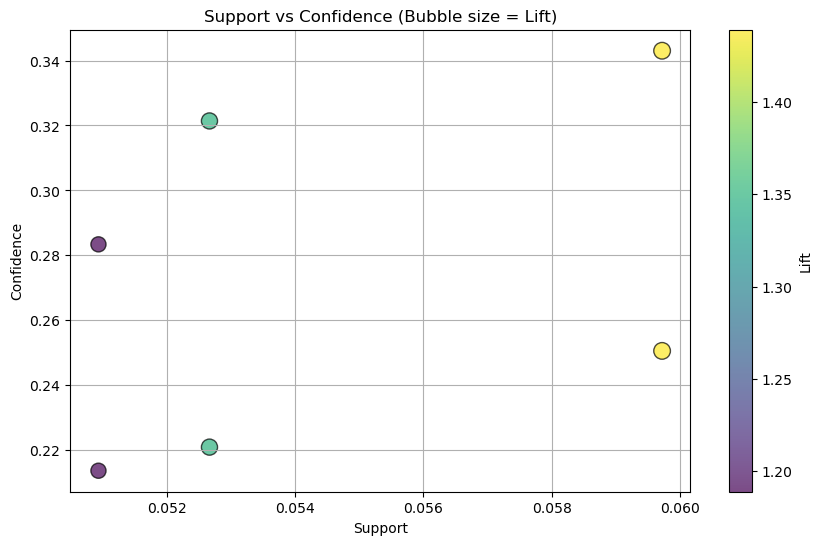

In [31]:
# Scatter plot of Support vs Confidence, bubble size = Lift
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.7, s=rules['lift']*100, c=rules['lift'], cmap='viridis', edgecolors='k')
plt.title('Support vs Confidence (Bubble size = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(label='Lift')
plt.grid(True)
plt.show()

The scatter plot visualizes the relationship between support and confidence for the association rules, with bubble size and color indicating lift. From the plot, we can observe that most rules with high confidence tend to have moderate to low support, which is typical in market basket data where strong associations exist among less frequent itemsets. Larger and darker bubbles (indicating higher lift) cluster around the upper-right quadrant, suggesting that a few rules not only occur reliably but also have a strong associative strength beyond random chance. This visual helps quickly identify rules that are both statistically significant and practically actionable for recommendation or bundling strategies.

After applying the Apriori algorithm with relaxed thresholds, the generated association rules reveal frequent item combinations that occur together in customer transactions. For instance, if a rule shows {spaghetti} → {mineral water} with high confidence and lift, it means that customers who buy Milk are highly likely to also buy Bread, and this pattern occurs more often than by chance. Such insights help retailers understand customer purchasing habits, enabling them to create product bundles, optimize store layouts, and enhance cross-selling strategies. Rules with high lift (e.g., >1.2) highlight particularly strong associations that are valuable for targeted marketing or recommendation engines.

#### 1. What is lift and why is it important in Association rules?

**Lift** is a metric used in association rule mining (like market basket analysis) to measure how much more likely two items are bought together compared to if they were bought independently.

* Lift = 1: No association; items occur together by chance.
* Lift > 1: Positive association; buying one increases the chance of buying the other
* Lift < 1: Negative association; buying one reduces the chance of buying the other.

**Example from "Online Retail" Dataset:**
If many customers who buy "White Hanging Heart" also buy "White Metal Lantern", and the lift is 2.5, it means they are bought together 2.5 times more often than expected by chance.

* It highlights strong and meaningful item combinations.
* Helps in creating product bundles and improving recommendations.
* Filters out rules that appear strong but are due to chance.

**In short:** Lift helps identify valuable associations by comparing actual vs. expected co-occurrence.

#### 2. What is support and Confidence. How do you calculate them?

**1. Support**
Support tells us how frequently an item or itemset appears in the dataset.

* It shows how popular an item (or group of items) is.
* For example, if "Milk" appears in 100 out of 1,000 transactions, the support is 10%.

**Why it matters:**
Rules with very low support may not be useful in real business decisions because they apply to very few cases.

**2. Confidence**
Confidence tells us how often a rule has been found to be true.

* It measures the chance of buying item B given that item A was bought.
* For example, if 60 out of 100 people who bought "Milk" also bought "Bread", the confidence of the rule Milk → Bread is 60%.

**Why it matters:**
Confidence helps us know how strong or reliable a rule is. High confidence means item B usually follows item A in transactions.

| Metric     | Meaning                                           | Use Case              |
| ---------- | ------------------------------------------------- | --------------------- |
| Support    | How often the items occur together in the dataset | Shows item popularity |
| Confidence | How often item B is bought when item A is bought  | Shows rule strength   |

* Support = Popularity of the item or itemset in all transactions.
* Confidence = Accuracy of the rule, based on how often B follows A.

#### 3. What are some limitations or challenges of Association rules mining?

Association rule mining is useful for finding patterns in data (like market basket analysis), but it also has several limitations and challenges:

1. Too Many Rules
* One of the biggest challenges is that the algorithm can generate thousands of rules, many of which are not useful.
* It becomes hard to manually filter out the meaningful rules.

2. Low Support but High Confidence
* Sometimes a rule may have high confidence (seems strong) but low support (very rare in actual data).
* Such rules may not be practically useful for decision-making.

3. Ignores Causality
* Association rules only show relationships, not cause and effect.
* For example, just because customers who buy bread often buy butter doesn’t mean bread causes butter to be bought.

4. Computational Complexity
* When the dataset is large, it takes a lot of time and memory to calculate all possible item combinations.
* This becomes a problem with millions of transactions.

5. Difficult Parameter Tuning
* Choosing the right values for support, confidence, and lift thresholds is tricky.
* If thresholds are too low, you get too many rules; if too high, you might miss important patterns.

6. Not Suitable for All Data Types
* Association rule mining works best with categorical or transaction-style data.
* It’s not directly useful for numerical or time-series data without pre-processing.

| Challenge                    | Description                                |
| ---------------------------- | ------------------------------------------ |
| Too many rules               | Hard to interpret large number of rules    |
| High confidence, low support | Rules may look good but occur rarely       |
| No causality                 | Finds patterns but not real reasons        |
| Performance issues           | Slow on large datasets                     |
| Threshold tuning             | Requires trial-and-error                   |
| Limited to categorical data  | Doesn’t work well with numerical/time data |